# Importing The Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/IBM HR Analytics Employee Attrition & Performance Case Study/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(path)

# 0 Understanding the Data and Defining the Problem

<h5> Analyzing each attribute: 
This is a fictional data set created by IBM data scientists.

**Education**
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobInvolvement**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'
<h5>


<h5>
The Problem that this notebook will be trying to solve is simply "knows the employee attrition. Using Some EDA, we can answer multiple questions, such as:

1. show me a breakdown of distance from home by job role and attrition
2. compare average monthly income by education and attrition  
<h5>

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
def ExploringTheData(df):
  print("The Shape: ",df.shape)
  print("Simple Description of The Data: ", df.describe().T)
  print("The Number of Duplicate Data:",df.duplicated().sum())
  print("Check the Null values for each feature")
  print("Feature Name:      Value")
  print(df.isnull().sum())

  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
ExploringTheData(df)

The Shape:  (1470, 35)
Simple Description of The Data:                             count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [ ]:
#Check the Values which has one unique value
columnsHavingOneValue = []
for column in df.columns:
  if(df[column].nunique() == 1):
    columnsHavingOneValue.append(column)
columnsHavingOneValue

['EmployeeCount', 'Over18', 'StandardHours']

In [ ]:
# Drop useless feat
df.drop(columns=['StandardHours','EmployeeCount', 'Over18'], inplace= True)

<h5> We can see from above that there is no null values nor duplicate values. The description clearly shows that we will be dealing with categorical and numerical features. Also, the Attrition is binary category, so we are dealing with classification problem in this case study

**Check the unique of attrition and its distribution** 

In [ ]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x7f122ef0ff50>,
 [Text(-1.4865598586092734, 0.8247058789481118, 'No'),
  Text(1.530282207391899, -0.8489619342112917, 'Yes')],
 [Text(-0.830724626869888, 0.46086505000041533, '83.9%'),
  Text(0.8744469756525135, -0.4851211052635952, '16.1%')])

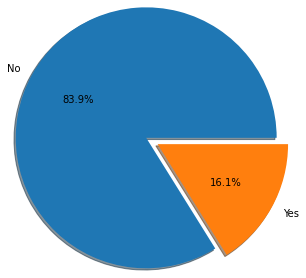

In [ ]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True)

If we depend on this data, the machine learning algorithms will be somehow baised since the 16.1% only of employees have yes as attrition. In this sense the target variable is imbalance, so we need to increase this data. As far as I know, there are multiple solutions to overcome the imbalanced data problem, like Oversampling, undersampling, and SMOTE technique. Later I will use **SMOTE technique** to balance the data.



In [ ]:
#knowing the categorical and numerical features
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [ ]:
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
numeric_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# 1.Data Visualization

In [ ]:
#Convert them to label for visualization 
dataForVisual = df.copy()

<h5>Label all categorical features to visualize them

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
for i in categorical_columns :
    dataForVisual[i] = le.fit_transform(dataForVisual[i])

In [ ]:
dataForVisual

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
attrition = dataForVisual[(dataForVisual['Attrition'] != 0)]
no_attrition = dataForVisual[(dataForVisual['Attrition'] == 0)]

<h5> Visualize the whole data
</h5>

In [ ]:
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

## 1.1 **Visualize the Categorical Features for interpretation**
<h5> Keep in mind that there are some features considered numeric "int-64" However, they are ordinal data, so I will also its importance in this section

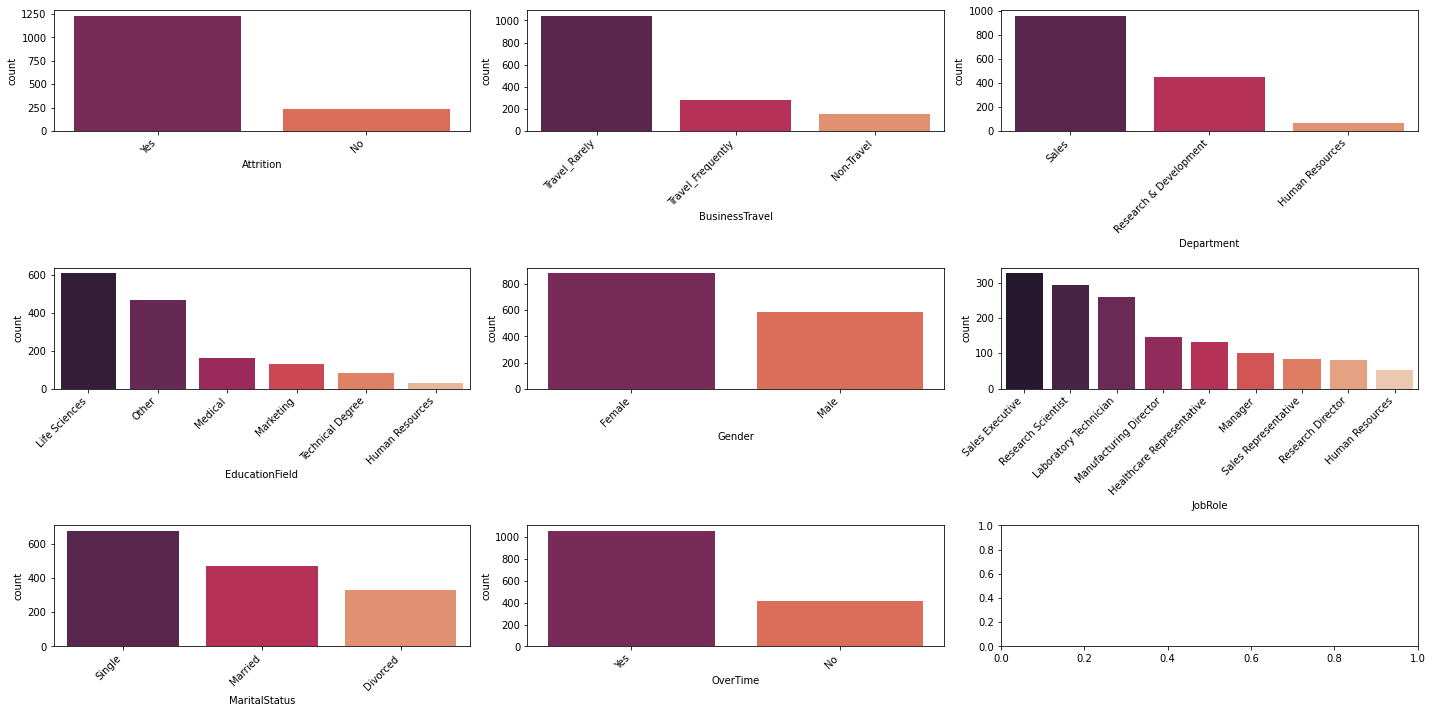

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

From above, we can see that 
- Most of the employees travel rarely
- Most of the employees work overtimes
- There are more females than males

In [ ]:
def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")

In [ ]:
!pip3 install arcticdata

In [ ]:
def compare_attrition(x, df):
    print(df[[x,"Attrition"]].groupby([x],as_index=False).mean())
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x=x,y="Attrition",data=df,ax=ax,palette='colorblind')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

In [ ]:
import arcticdata.ExploratoryDataAnalysis as eda


<h5> Let's Go to into more details with each feature and understand it <h5>

The feature Age is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


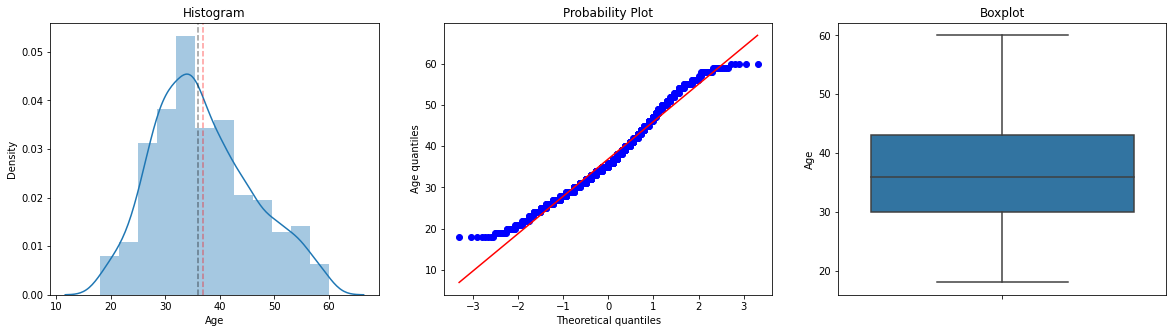

In [ ]:
eda.feature_analysis(df,'Age')

<h5> We can notice that the Feature is somehow balanced with respect to the normal distribution<h5>

The feature BusinessTravel is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


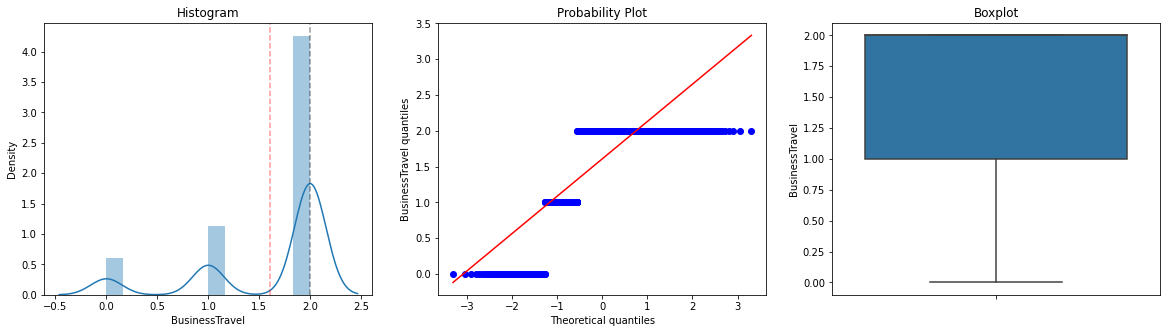

In [ ]:
eda.feature_analysis(dataForVisual,'BusinessTravel')

<h5> The Data is more focused on Travel Rarely<h5>

Now, we need to know how this feature is correlated with respect to the attrition. **Does it mean that the obstacle employees encounters is due to "rare traveling"?**

In [ ]:
def visualBet2Variables(feature,dataForVisual):
  plt.figure(figsize=(14,5))

  plt.subplot(1,2,1)
  plt.hist(dataForVisual[feature][dataForVisual['Attrition'] == 0], bins=30, alpha = 0.7, label = 'Attrition = 0')
  plt.hist(dataForVisual[feature][dataForVisual['Attrition'] == 1], bins=30, alpha = 0.7, label = 'Attrition = 1')
  plt.ylabel('Distribution')
  plt.xlabel('Feature' + feature)
  plt.legend()

  plt.legend()

  plt.show()

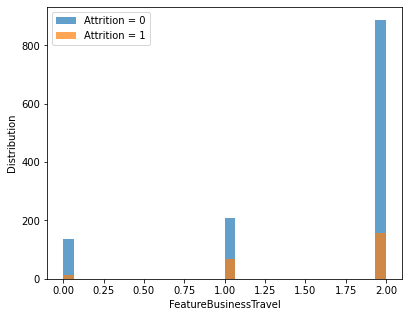

In [ ]:
visualBet2Variables('BusinessTravel',dataForVisual)

<h5> We can notice that Rare Traveling is concerning with employees. Alsom no relation between increasing attrition and traveling </h5>

The feature Gender is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


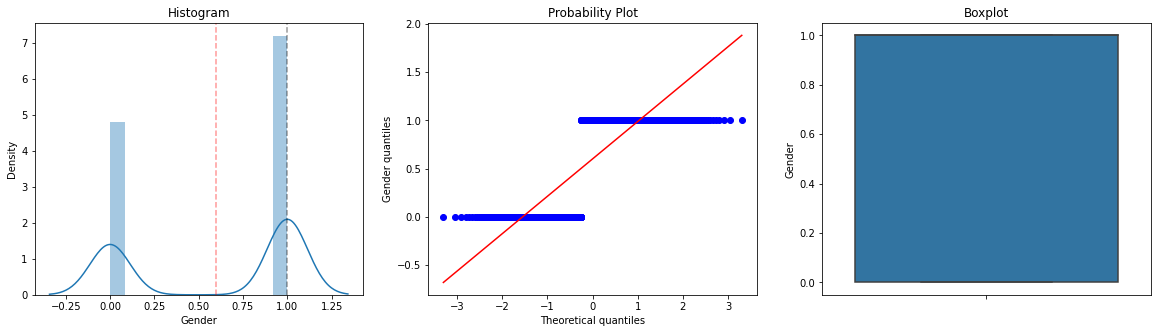

In [ ]:
eda.feature_analysis(dataForVisual,'Gender')

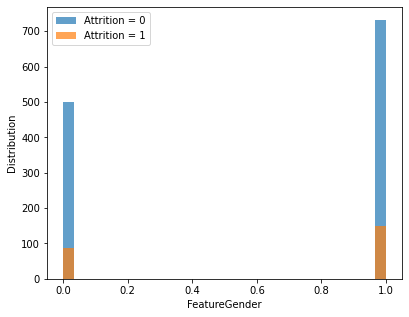

In [ ]:
visualBet2Variables('Gender',dataForVisual)

We can see that males are slightly larger in the data set compared to the female. However, we can say that the feature is balanced

The feature JobRole is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


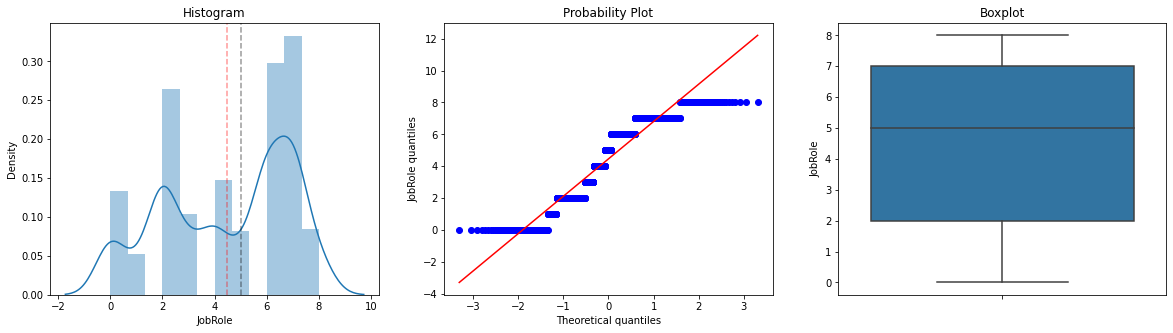

In [ ]:
eda.feature_analysis(dataForVisual,'JobRole')

The feature JobRole is CATEGORICAL

-Cardinality: 9
-Missing values in training set: 0


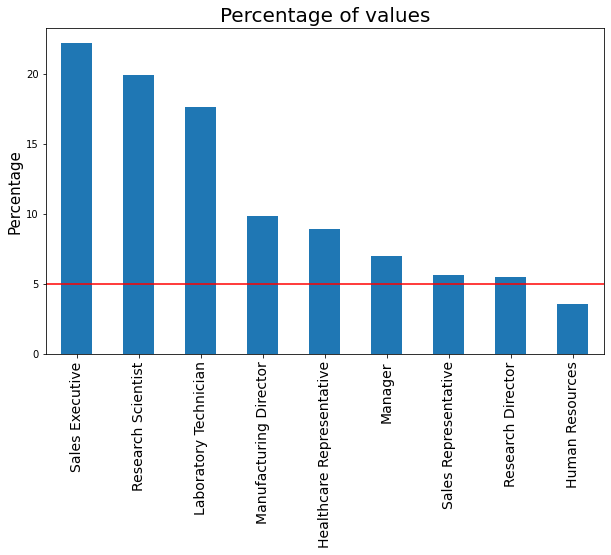

In [ ]:
eda.feature_analysis(df,'JobRole')

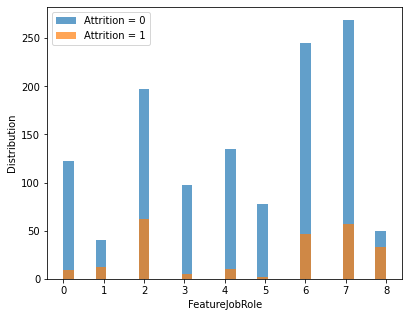

In [ ]:
visualBet2Variables('JobRole',dataForVisual)

The feature DailyRate is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


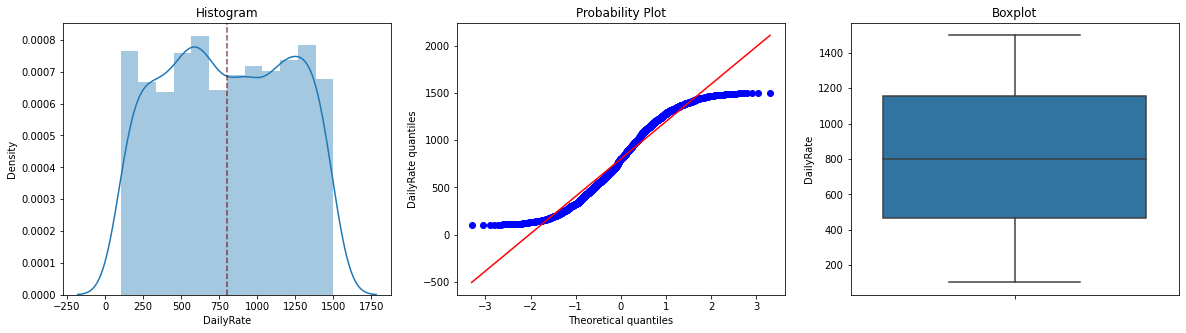

In [ ]:
eda.feature_analysis(df,'DailyRate')

The feature DistanceFromHome is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


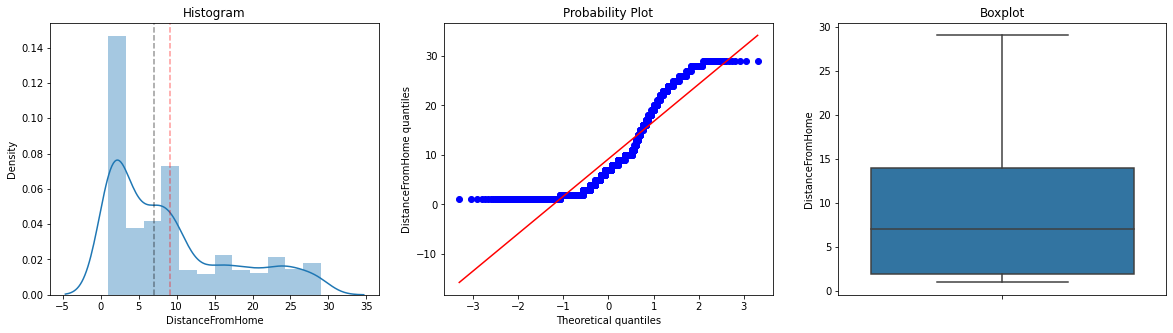

In [ ]:
eda.feature_analysis(df,'DistanceFromHome')


    DistanceFromHome  Attrition
0                  1   0.125000
1                  2   0.132701
2                  3   0.166667
3                  4   0.140625
4                  5   0.153846
5                  6   0.118644
6                  7   0.130952
7                  8   0.125000
8                  9   0.211765
9                 10   0.127907
10                11   0.137931
11                12   0.300000
12                13   0.315789
13                14   0.190476
14                15   0.192308
15                16   0.218750
16                17   0.250000
17                18   0.153846
18                19   0.136364
19                20   0.160000
20                21   0.166667
21                22   0.315789
22                23   0.185185
23                24   0.428571
24                25   0.240000
25                26   0.120000
26                27   0.250000
27                28   0.086957
28                29   0.185185


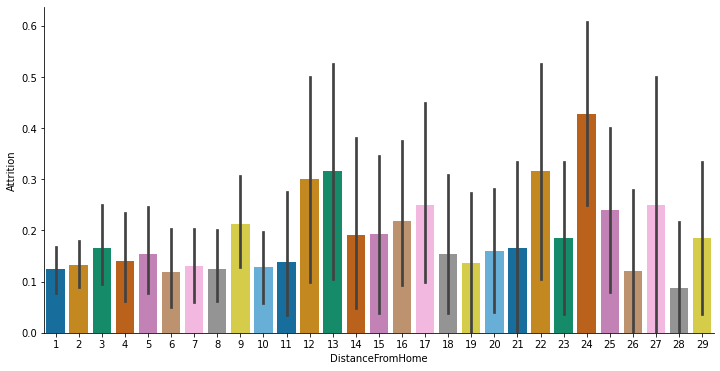

In [ ]:
compare_attrition("DistanceFromHome",dataForVisual)

We can see that distance from home affect the attrition. However, what about 26, 28, 19? We need to see other features to decide what we will be needing to delete.

The feature Education is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


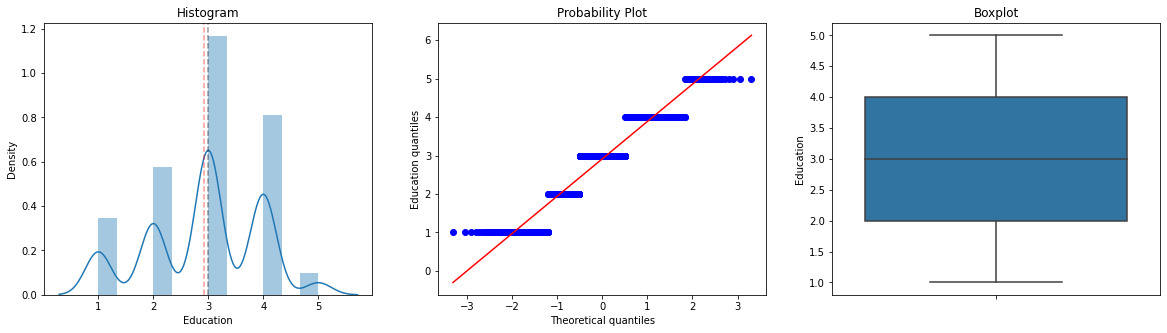

In [ ]:
eda.feature_analysis(df,'Education')


   Education  Attrition
0          1   0.182353
1          2   0.156028
2          3   0.173077
3          4   0.145729
4          5   0.104167


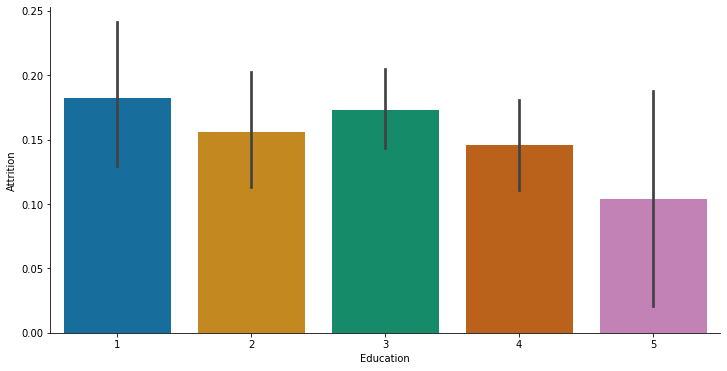

In [ ]:
compare_attrition("Education",dataForVisual)

The feature JobLevel is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


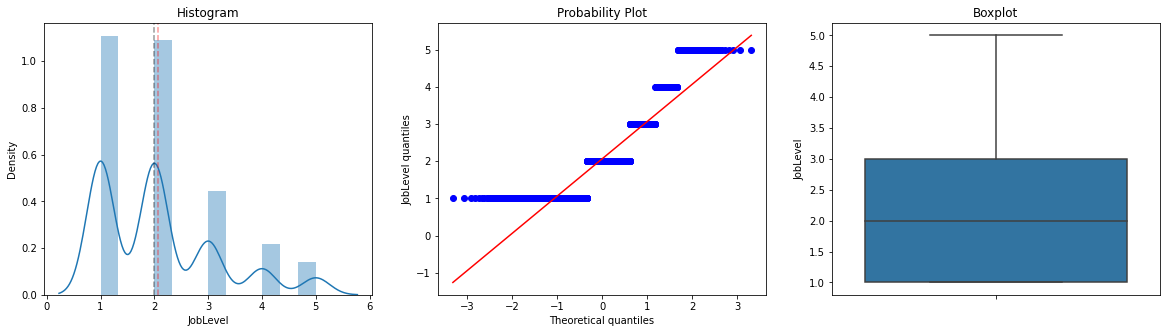

In [ ]:
eda.feature_analysis(df,'JobLevel')


The feature JobSatisfaction is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


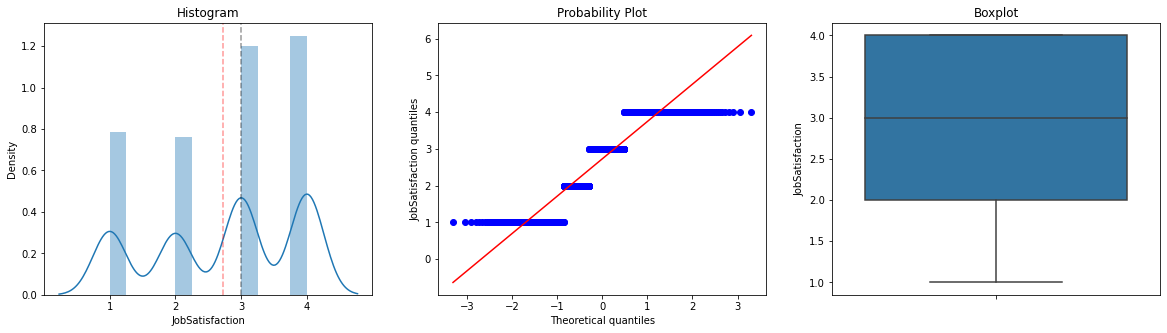

In [ ]:
eda.feature_analysis(df,'JobSatisfaction')


The advanced level of education affects on the output.

The feature YearsSinceLastPromotion is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 107
-Outliers   3*IQR: 32


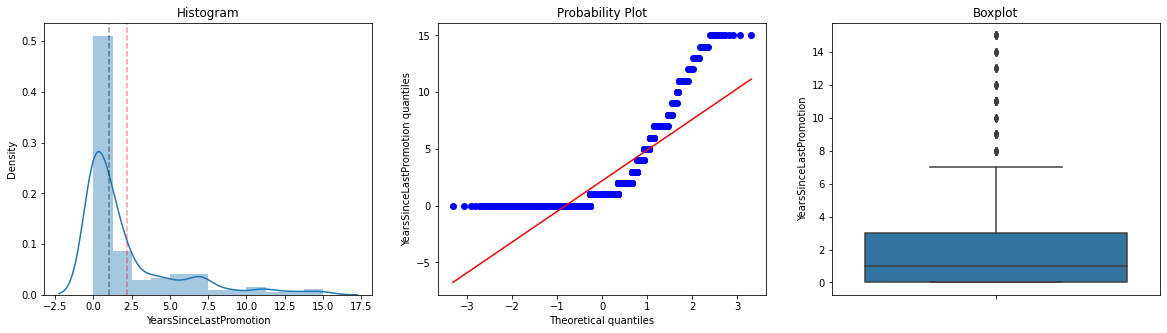

In [ ]:
eda.feature_analysis(df,'YearsSinceLastPromotion')

<h4>From IQR, we can notice that there are many outliers. Now, something is weird now. Why does someone have more than 15 years of experience and no promotion? We need to handle this in outlier analysis section <h4>

The feature YearsInCurrentRole is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 21
-Outliers   3*IQR: 0


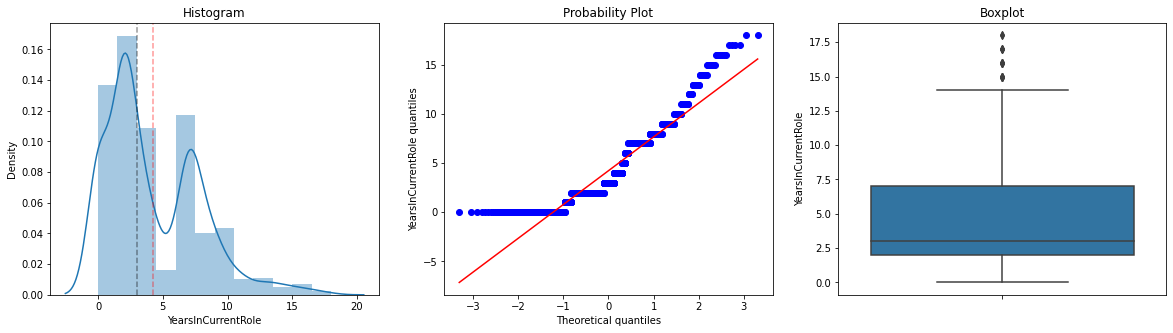

In [ ]:
eda.feature_analysis(df,'YearsInCurrentRole')


    YearsInCurrentRole  Attrition
0                    0   0.299180
1                    1   0.192982
2                    2   0.182796
3                    3   0.118519
4                    4   0.144231
5                    5   0.027778
6                    6   0.054054
7                    7   0.139640
8                    8   0.078652
9                    9   0.089552
10                  10   0.068966
11                  11   0.000000
12                  12   0.100000
13                  13   0.071429
14                  14   0.090909
15                  15   0.250000
16                  16   0.000000
17                  17   0.000000
18                  18   0.000000


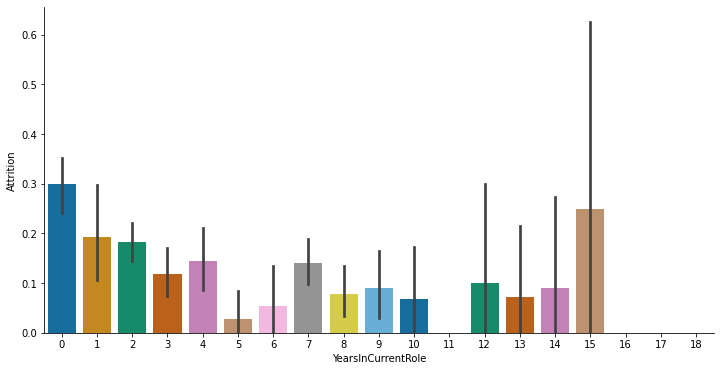

In [ ]:
compare_attrition("YearsInCurrentRole",dataForVisual)

The feature YearsAtCompany is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 104
-Outliers   3*IQR: 19


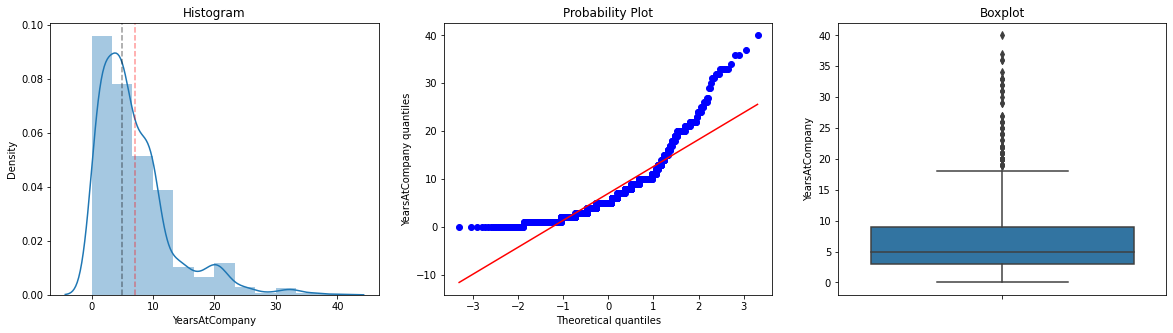

In [ ]:
eda.feature_analysis(df,'YearsAtCompany')


<h5> There are many outliers we need to handle </h5>

    YearsAtCompany  Attrition
0                0   0.363636
1                1   0.345029
2                2   0.212598
3                3   0.156250
4                4   0.172727
5                5   0.107143
6                6   0.118421
7                7   0.122222
8                8   0.112500
9                9   0.097561
10              10   0.150000
11              11   0.062500
12              12   0.000000
13              13   0.083333
14              14   0.111111
15              15   0.050000
16              16   0.083333
17              17   0.111111
18              18   0.076923
19              19   0.090909
20              20   0.037037
21              21   0.071429
22              22   0.066667
23              23   0.500000
24              24   0.166667
25              25   0.000000
26              26   0.000000
27              27   0.000000
28              29   0.000000
29              30   0.000000
30              31   0.333333
31              32   0.333333
32        

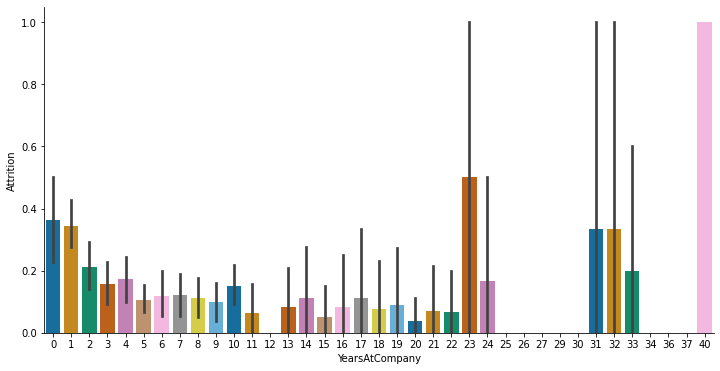

In [ ]:
compare_attrition("YearsAtCompany",dataForVisual)

Is it an outlier? I guess it makes sense that attrition of false is 100% after 40 years. This is normal

The feature WorkLifeBalance is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 0
-Outliers   3*IQR: 0


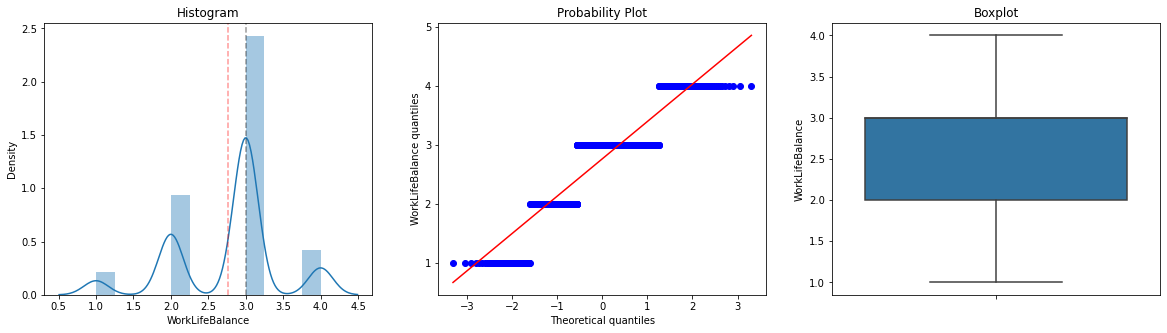

In [ ]:
eda.feature_analysis(df,'WorkLifeBalance')


   WorkLifeBalance  Attrition
0                1   0.312500
1                2   0.168605
2                3   0.142217
3                4   0.176471


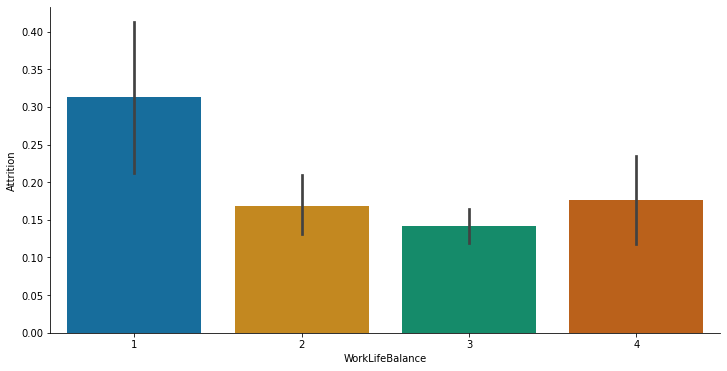

In [ ]:
compare_attrition('WorkLifeBalance',dataForVisual)


## 1.2 Visualize the Numerical Features For interpretation

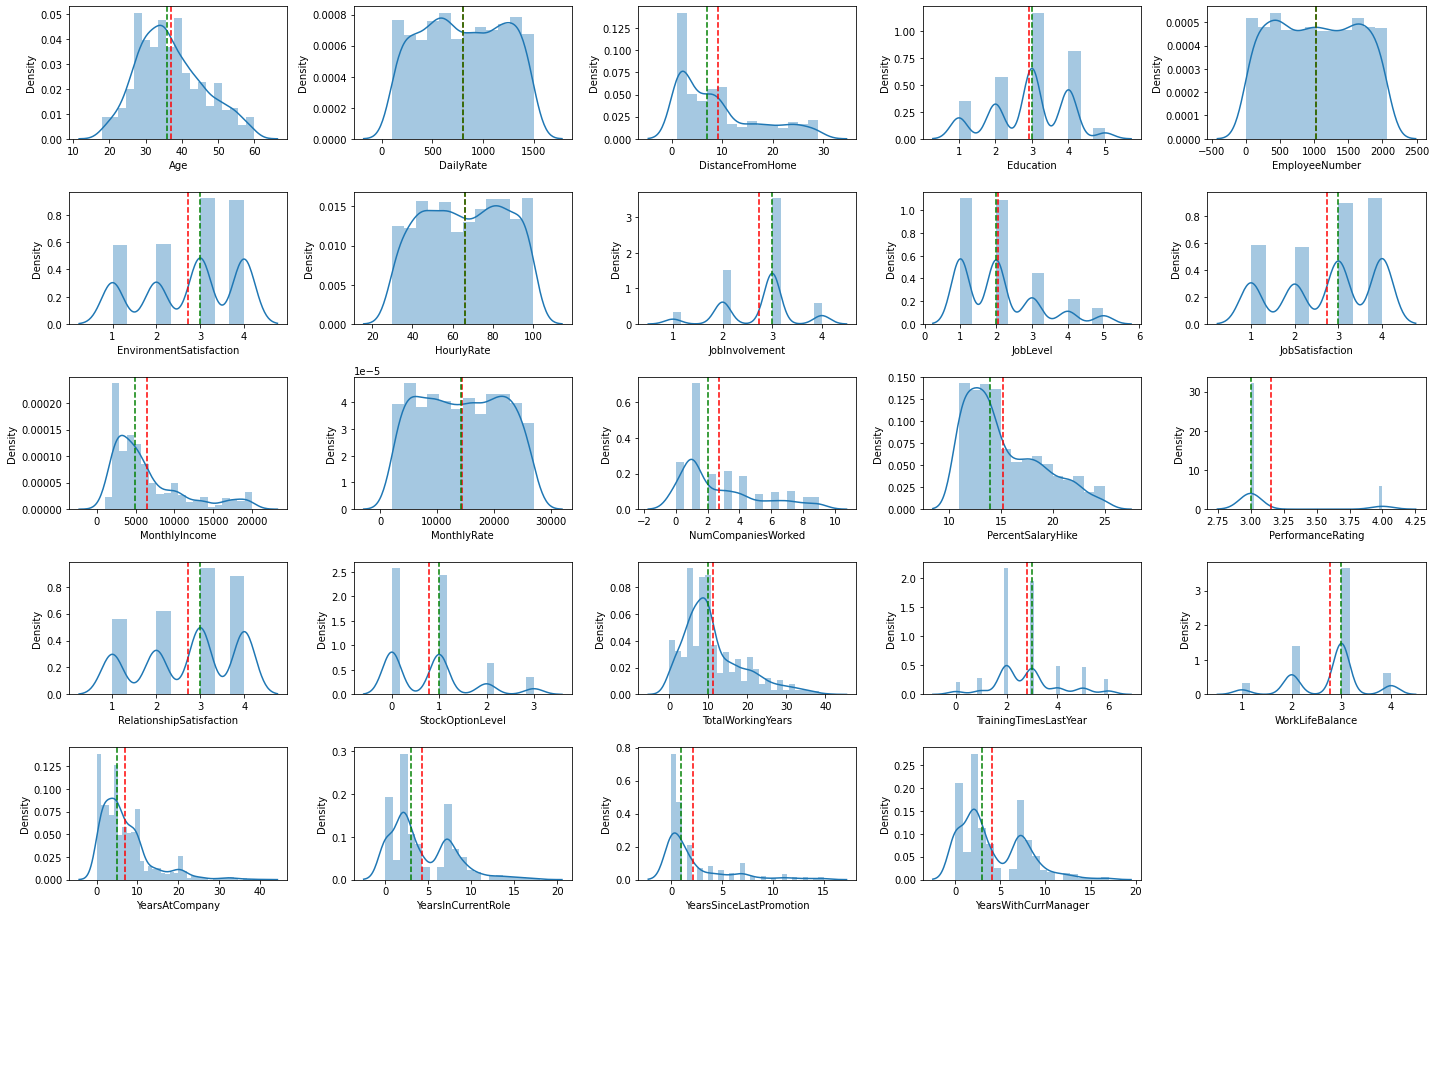

In [ ]:
fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(df, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()

Now, we can notice that there are employees which work for over 10 years without a promotion which is quite weird.


<h5> Check the Skewness </h5>

In [ ]:
len(numeric_columns)

24

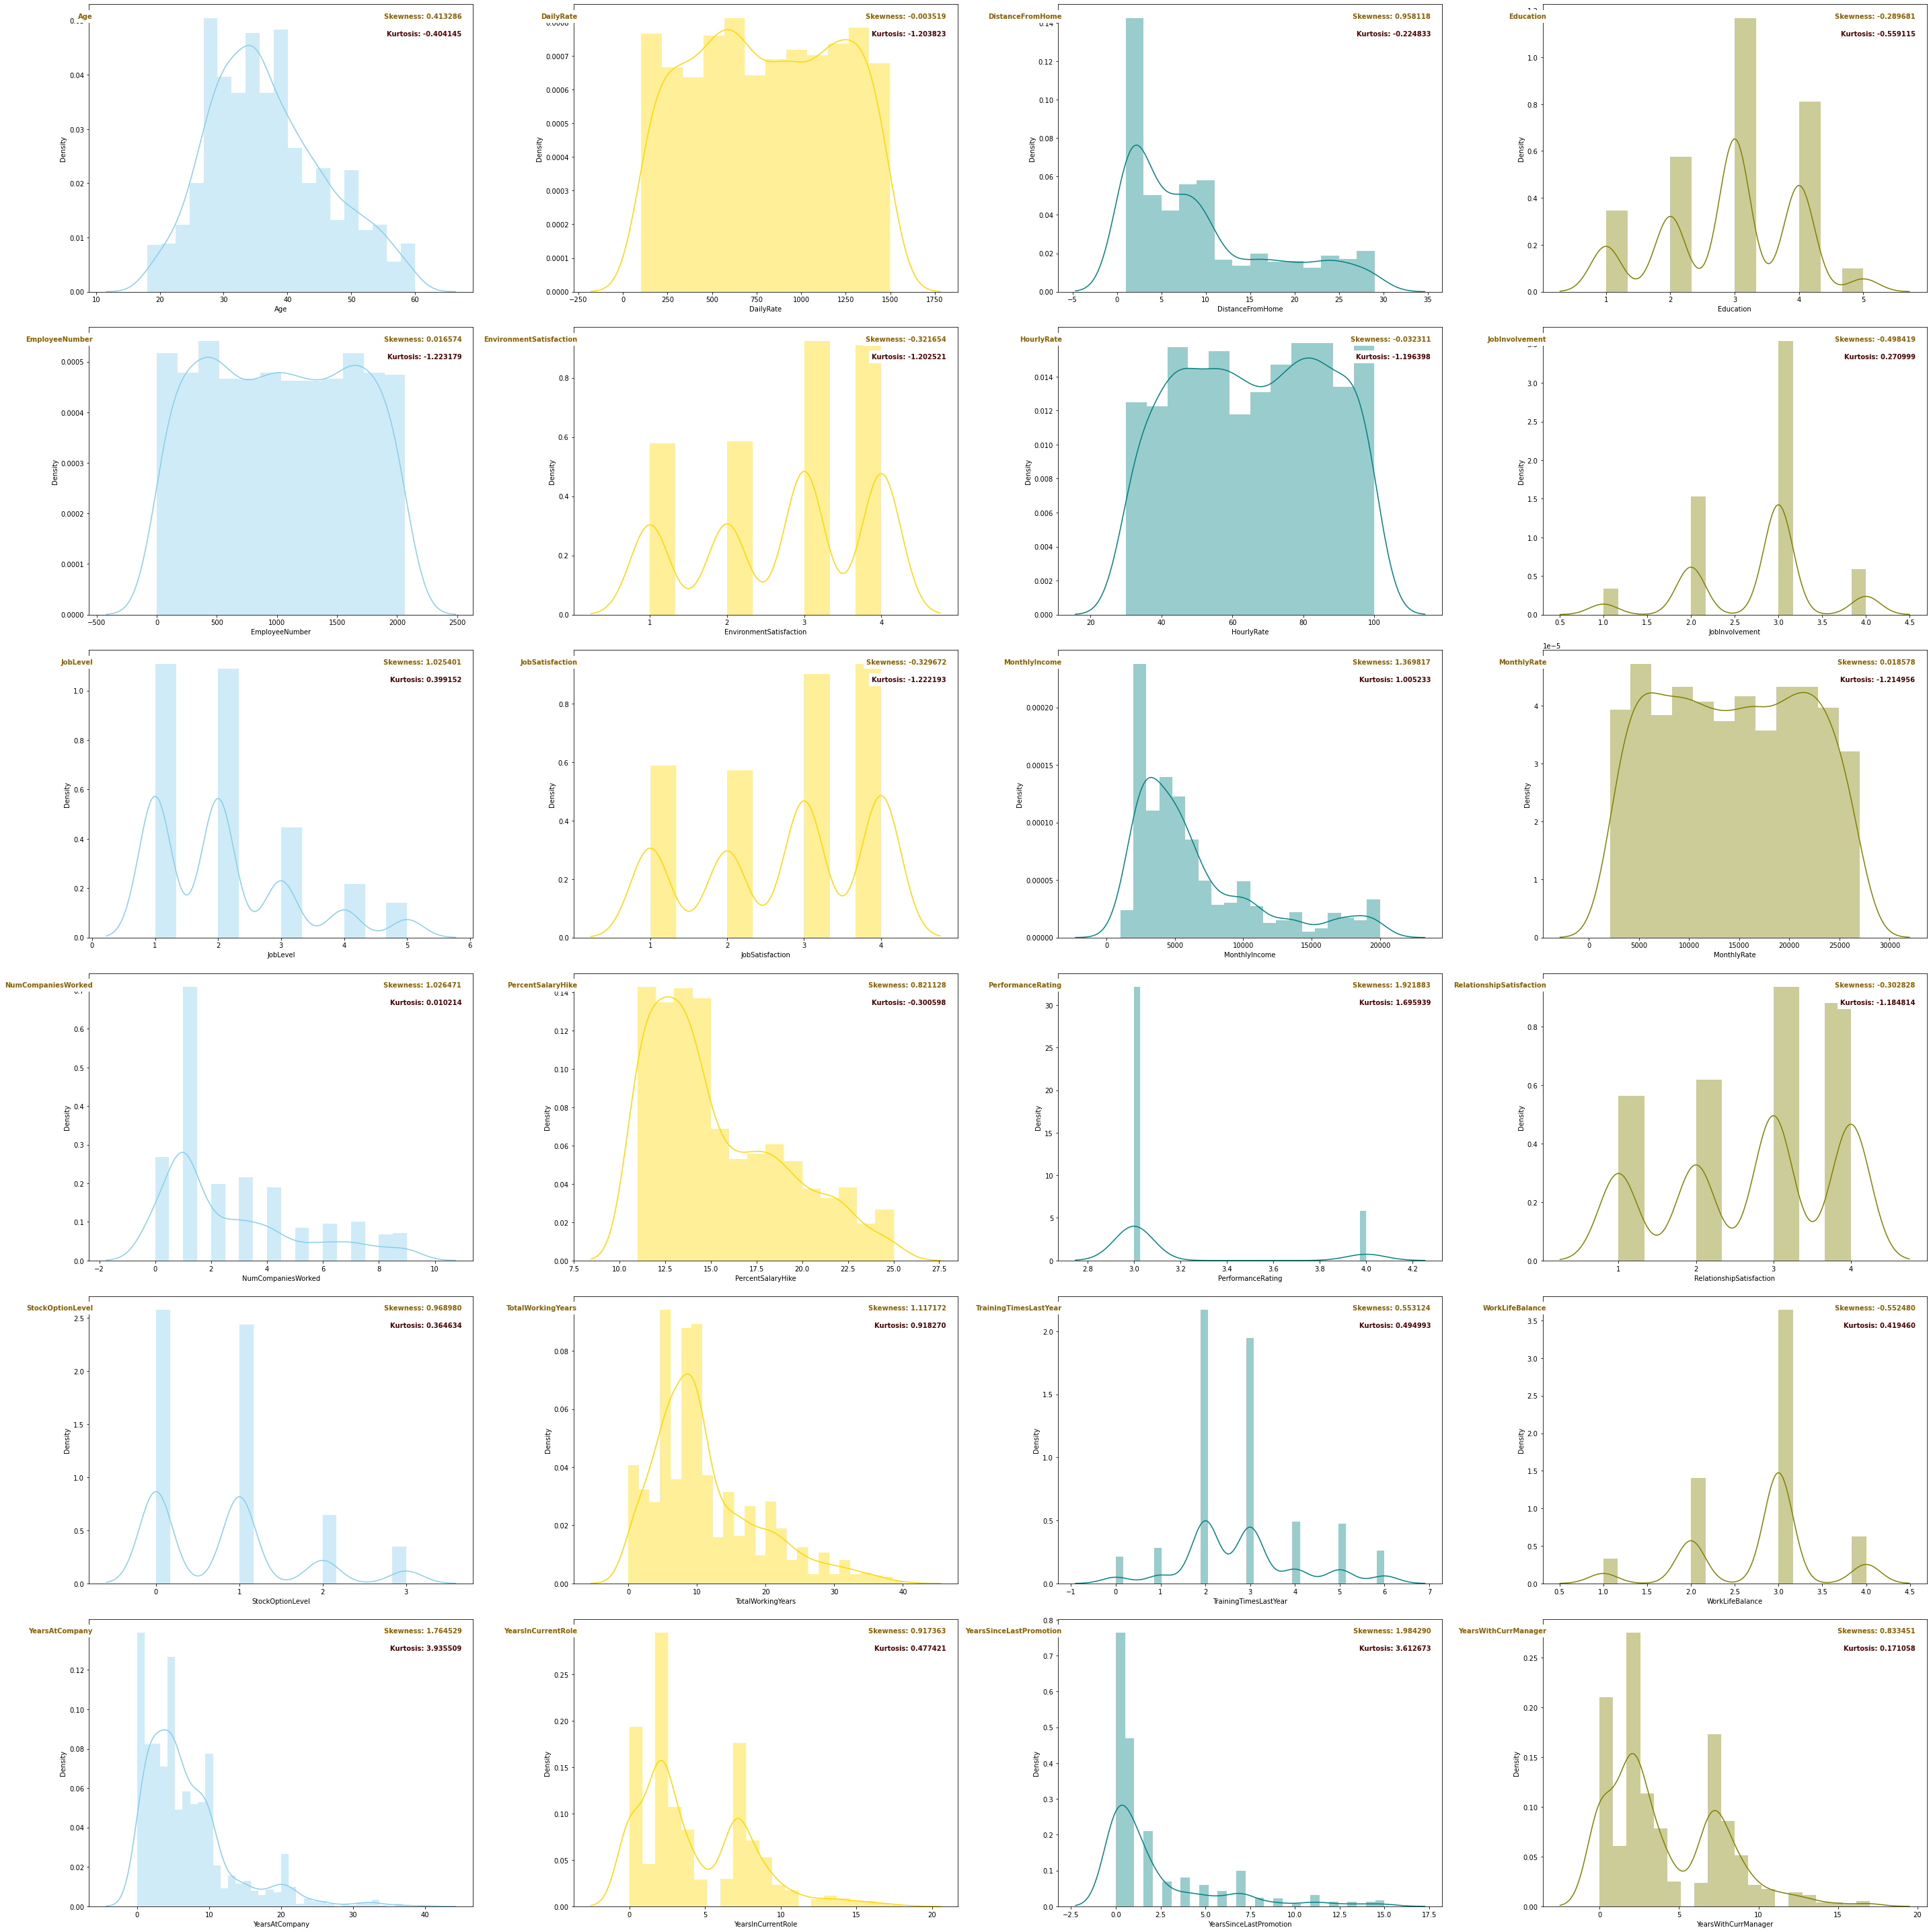

In [ ]:
def drawAndCheckSkewnessAndKurtosis(df_copy):
  colors = ["skyblue","gold","teal","olive"]
  namesOfFeatures = numeric_columns

  colorIdx = 0
  f, axes = plt.subplots(6,4,figsize=(40, 40))
  i = 0
  j = 0
  take = 0
  for feature in namesOfFeatures:
      sns.distplot(df_copy[feature], color=colors[colorIdx%4], ax=axes[i,j])
      if j >= 3: 
          i+=1
          j=0
      else: 
          j+=1
      colorIdx+=1

  for i, ax in enumerate(axes.reshape(-1)):
    if(i >= 77):
      continue
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_copy.iloc[:,i].skew(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df_copy.iloc[:,i].kurt(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:dried blood')
    ax.text(x=0.01, y=0.97, transform=ax.transAxes, s=namesOfFeatures[i],\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
      
  plt.tight_layout()
drawAndCheckSkewnessAndKurtosis(df[numeric_columns])

<h5> we can notice that there are some skewed features. </h5> 

## 1.3Check the Variance of each feature

In [ ]:
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
FeaturesTobeVisualized = [ 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'RelationshipSatisfaction'
 ,'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'StockOptionLevel',
 ]

In [ ]:
# Checking for variables with 0.1 variance
from statistics import variance
def checkVarianceForCategoricalFeatures(dataForVisual):
  nzv=[]
  for i in dataForVisual.columns:
    if variance(dataForVisual[i]) <= 0.1:
      nzv.append(i)
  return nzv


In [ ]:
nzv = checkVarianceForCategoricalFeatures(dataForVisual)
nzv

[]

## 1.4 Check the multicolinearity between numerical features


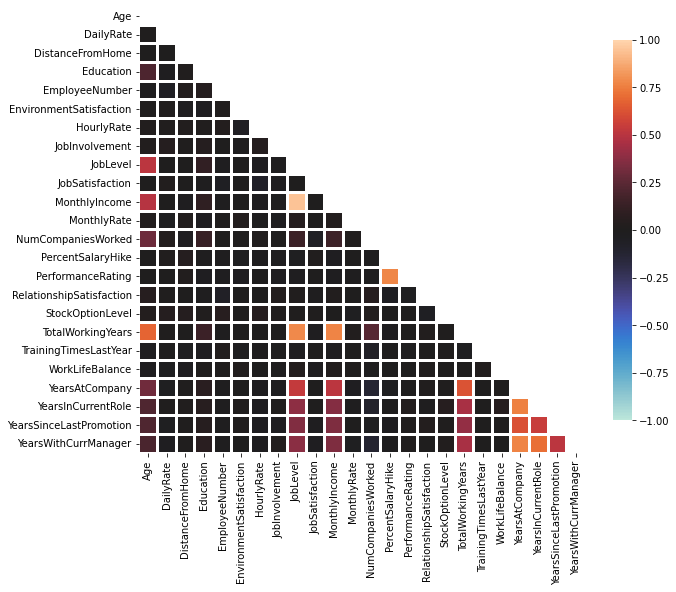

In [ ]:
corr = df[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("icefire", as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, annot=False, fmt= '.2f', vmin=-1, vmax=1, square = True, linewidth=2, cbar_kws={"shrink": 0.7}, ax=ax)

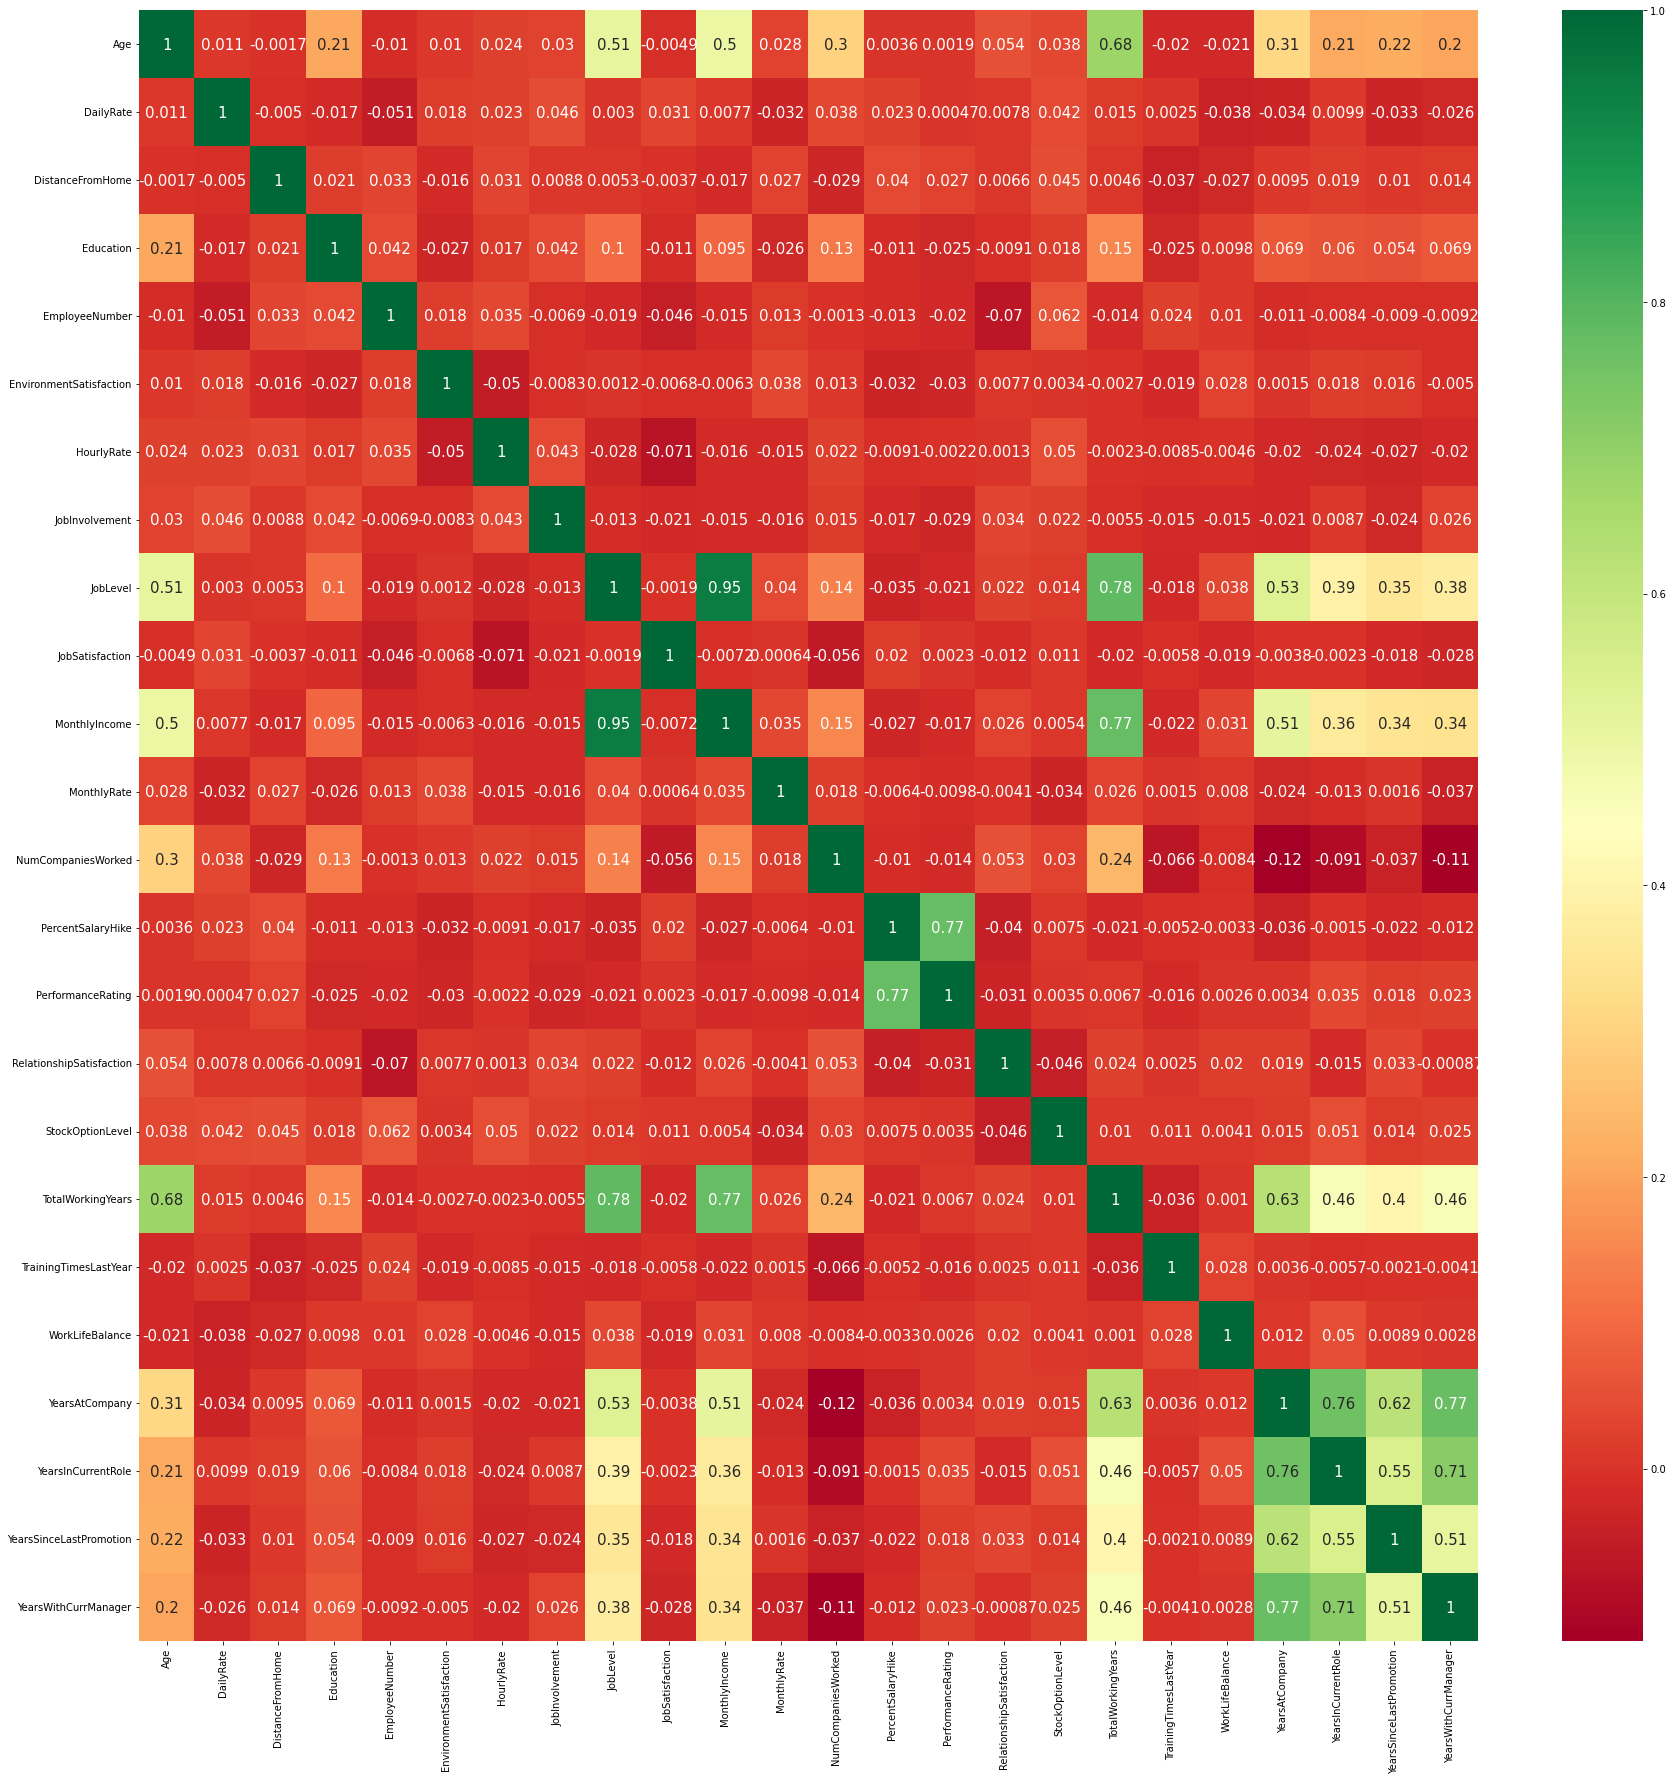

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

Obeservation from above: 

- High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
- High correlation between JobLevel and MonthlyIncome
- High correlation between TotalWorkingYears and YearsSinceLastPromotion
- YearsSinceLastPromotion is correlated with YearsAtCompany and YearsInCurrentRole

<h4> Using PointBiserial to check the correlation between the numerical Data and Output data </h4>

In [ ]:
import scipy.stats as stats
def PointBiserial(df, output = 'Attrition'):
  IndependentFeatures = []
  for feature in numeric_columns:
    _, p_value = stats.pointbiserialr(dataForVisual[output], df[feature])
    if(p_value > 0.05):
      IndependentFeatures.append(feature)
  return IndependentFeatures

IndependentFeatures = PointBiserial(dataForVisual)
IndependentFeatures

['Education',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'YearsSinceLastPromotion']

<h3> Using Chi Square Test of Independence </h3>

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
FeaturesTobeVisualized.append('EducationField')
FeaturesTobeVisualized.append('PerformanceRating')
FeaturesTobeVisualized.append('StockOptionLevel')
FeaturesTobeVisualized.append('WorkLifeBalance')


In [ ]:
from scipy.stats import chi2_contingency
cat_cols=FeaturesTobeVisualized
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Gender are independent (p-value = 0.29).

Attrition and Education are independent (p-value = 0.55).

Attrition and RelationshipSatisfaction are independent (p-value = 0.15).

Attrition and PerformanceRating are independent (p-value = 0.99).



,Variable,Chi_Statistic,P_value
6,OverTime,87.564294,8.158424e-21
4,JobRole,86.190254,2.752482e-15
11,JobLevel,72.529013,6.634685e-15
13,StockOptionLevel,60.598301,4.379390e-13
16,StockOptionLevel,60.598301,4.379390e-13
5,MaritalStatus,46.163677,9.455511e-11
10,JobInvolvement,28.492021,2.863181e-06
0,BusinessTravel,24.182414,5.608614e-06
9,EnvironmentSatisfaction,22.503881,5.123469e-05
12,JobSatisfaction,17.505077,5.563005e-04


# 2.Handling The Outliers
We need to delete outliers to be able to deal with visualization much better.

- keep in mind that from Data visualization, we saw that there are outliers in the following features: 
['YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany']

It is important to use some advanced outlier techniques to identify the outliers without affecting on the sense of the data

<h3> Using LOF</h3>

In [ ]:
from sklearn import preprocessing
#Labeling the Attrition in df
df_used = df.copy()
le = preprocessing.LabelEncoder()
le.fit(df_used['Attrition'])
LabelEncoder()
df_used['Attrition'] = le.transform(df_used['Attrition'])

In [ ]:
df_used.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

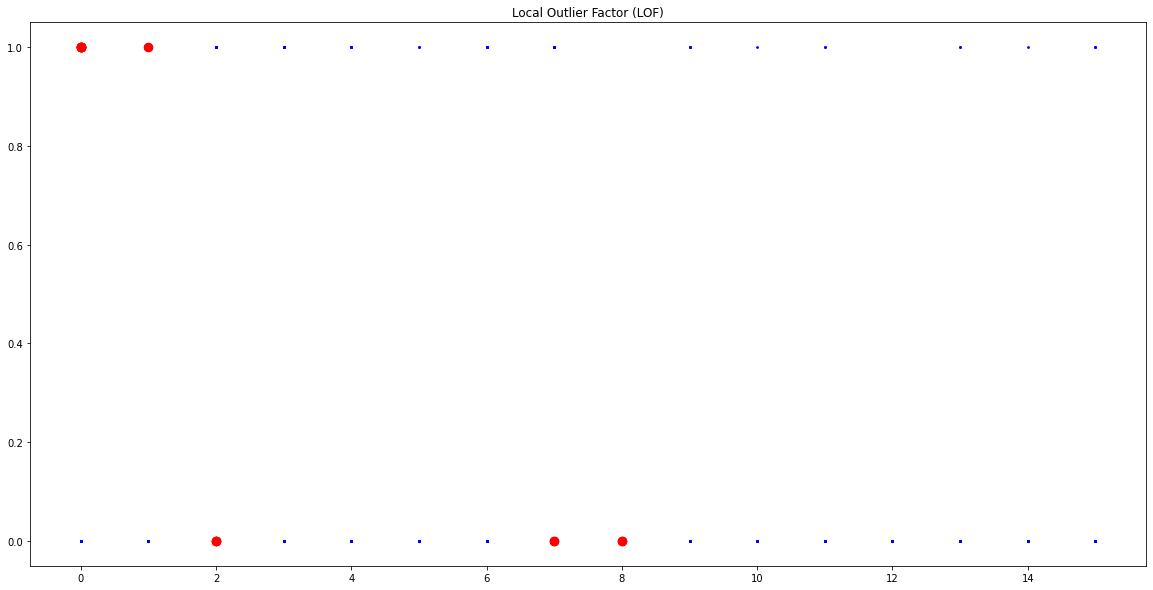

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
colsMahal = ['YearsSinceLastPromotion','Attrition', 'YearsWithCurrManager']
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_used[colsMahal])

X_scores = clf.negative_outlier_factor_

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
df_inlier = df_used[in_mask]
df_outlier = df_used[out_mask]
plt.figure(figsize=(20, 10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_inlier['YearsSinceLastPromotion'], df_inlier['Attrition'], color="b", s=3.0, label="Data points")
plt.scatter(df_outlier['YearsSinceLastPromotion'], df_outlier['Attrition'], color="r", s=70.0, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [ ]:
x = np.percentile(radius, 99.4)
x
df_used['radius'] = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(df_used[df_used['radius']>x].shape)
df_used[df_used['radius']>x].head()

(8, 33)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,radius
236,33,1,Travel_Rarely,465,Research & Development,2,2,Life Sciences,328,1,...,1,0,13,3,4,9,7,1,7,0.894737
336,29,1,Travel_Rarely,318,Research & Development,8,4,Other,454,2,...,4,0,7,4,2,7,7,0,7,0.894737
614,26,1,Travel_Frequently,887,Research & Development,5,2,Medical,848,3,...,1,1,8,2,3,8,7,1,7,0.894737
1077,29,1,Travel_Rarely,224,Research & Development,1,4,Technical Degree,1522,1,...,3,0,11,2,1,9,7,0,7,0.894737
1290,34,1,Travel_Frequently,234,Research & Development,9,4,Life Sciences,1807,4,...,3,1,11,3,2,7,1,0,7,0.894737


<h2> Using Isolation Forests </h2>

In [ ]:
df_used.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'radius'],
      dtype='object')

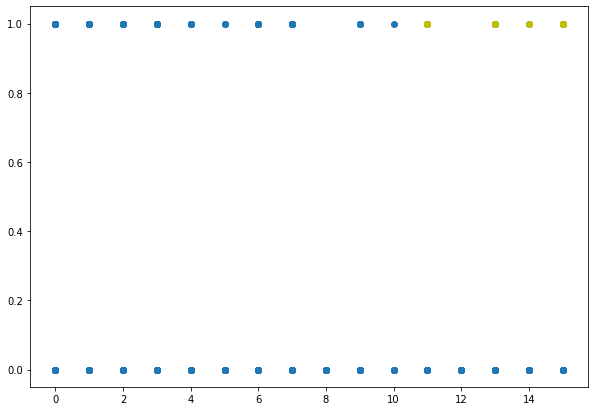

In [ ]:
# Isolation Forests

from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

IF = IsolationForest(n_estimators=100, contamination = 0.005, n_jobs=4, random_state=42)
cols = ['YearsSinceLastPromotion','Attrition']
predictions = IF.fit_predict(df_used[cols]) 

#the scikit learn api would mark outliers with a -1 for us
#let's extract them and plot them 
outlier_index = where(predictions==-1)
values = df_used.iloc[outlier_index]
plt.figure(figsize=(10, 7)) 
plt.scatter(df_used['YearsSinceLastPromotion'], df_used['Attrition'])
plt.scatter(values['YearsSinceLastPromotion'], values['Attrition'], color='y')

In [ ]:
print(len(np.array(outlier_index).reshape(-1, 1)))

8


In [ ]:
outlier_index

(array([  45,  126,  595,  695,  752,  813,  838, 1223]),)

In [ ]:
df_used['IsolationForestResults'] =  1 #Not outlier
for idx in outlier_index:
  df_used.iloc[idx,-1] = -1 # outlier

<h5> Now, we have used to techniques for outlier analysis. Now, we need to make use of them both and see which one is better for training the model.

# 3.Preprocessing the Data
- Remove the outliers from visual understanding
- Solve the problem of skewness
- Removing Multi-collinearity


<h2> Solve the Problem of Skewness</h2>

In [ ]:
df_copy = df_used.copy()
numeric_columns = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
# Check for variables with skew above 0.75
skew_limit = 0.75
skew_vals = df_copy[numeric_columns].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df_copy[i] = df_copy[i].apply(np.log1p)

,Skew
YearsSinceLastPromotion,1.984290
YearsAtCompany,1.764529
MonthlyIncome,1.369817
TotalWorkingYears,1.117172
DistanceFromHome,0.958118
YearsInCurrentRole,0.917363
YearsWithCurrManager,0.833451


<h4> Multi-Collinearity </h4>

- High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
- High correlation between JobLevel and MonthlyIncome
- High correlation between TotalWorkingYears and YearsSinceLastPromotion

- Then, we will remove Age, MonthlyIncome, TotalWorking Years
- YearsSinceLastPromotion is correlated with YearsAtCompany

In [ ]:
df_copy.drop('Age',inplace = True, axis = 1)
df_copy.drop('MonthlyIncome',inplace = True, axis = 1)
df_copy.drop('TotalWorkingYears',inplace = True, axis = 1)


In [ ]:
df_copy.drop('YearsAtCompany',inplace = True, axis = 1)

Chi-Square Results: 
 - Attrition and Gender are independent (p-value = 0.29).

- Attrition and Education are independent (p-value = 0.55).

- Attrition and RelationshipSatisfaction are independent (p-value = 0.15).

In [ ]:
df_copy.drop('Gender',inplace = True, axis = 1)
df_copy.drop('Education',inplace = True, axis = 1)
df_copy.drop('RelationshipSatisfaction',inplace = True, axis = 1)


From Point-Biserial Linear Correlation, we need to delete the following:
[
 'EmployeeNumber',
 'MonthlyRate',
 'PerformanceRating',
 'HourlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'YearsSinceLastPromotion'
]

In [ ]:
df_copy.drop('EmployeeNumber',inplace = True, axis = 1)


In [ ]:
df_copy.drop('PerformanceRating',inplace = True, axis = 1)
df_copy.drop( 'MonthlyRate',inplace = True, axis = 1)
df_copy.drop( 'HourlyRate',inplace = True, axis = 1)
df_copy.drop( 'NumCompaniesWorked',inplace = True, axis = 1)
df_copy.drop( 'PercentSalaryHike',inplace = True, axis = 1)
df_copy.drop( 'YearsSinceLastPromotion',inplace = True, axis = 1)



# 3.Feature Engineering

In [ ]:
df_temp = df_copy.copy()

In [ ]:
df_copy.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'radius', 'IsolationForestResults'],
      dtype='object')

In [ ]:
def SalesDpt(data) :
    if data['Department'] == 'Sales':
        return 1
    else:
        return 0
df_copy['Department'] = df_copy.apply(lambda data:SalesDpt(data) ,axis = 1)

In [ ]:
#We see that all categorical features are nominal so we will encode all of them dummy encoding
df_copy = pd.get_dummies(data=df_copy,drop_first=True)

In [ ]:
radius = df_copy['radius']
IsolationForestResults = df_copy['IsolationForestResults']


In [ ]:
Y = df_copy['Attrition']
Y_total = Y.copy()
df_copy.drop( 'Attrition',inplace = True, axis = 1)
df_copy.drop( 'radius',inplace = True, axis = 1)
df_copy.drop( 'IsolationForestResults',inplace = True, axis = 1)


In [ ]:
#Scaling The data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_scaled = scale.fit_transform(np.array(df_copy))

In [ ]:
x_not_scaled = np.array(df_copy)

In [ ]:
df_cpp = df_copy.copy()

# 4.Training the Models

## 4.1 Using Logistic Regression

### 4.1.1 Experiment1: Without Outliers

In [ ]:
#Split the data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

def logisticRegression(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print(classification_report(y_test, y_pred))
  


In [ ]:
logisticRegression(df_copy,Y)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       245
           1       0.90      0.37      0.52        49

    accuracy                           0.89       294
   macro avg       0.89      0.68      0.73       294
weighted avg       0.89      0.89      0.87       294



In [ ]:
logisticRegression(x_scaled,Y)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.77      0.41      0.53        49

    accuracy                           0.88       294
   macro avg       0.83      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294



Scaling did not affect so much on the accuracy

### 4.1.2 Experiment 2: Removing outliers Using LOF

In [ ]:
df_copy

,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1102,1,0.693147,2,3,2,4,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1,279,0,2.197225,3,2,2,2,1,3,3,...,0,0,0,0,1,0,0,1,0,0
2,1373,0,1.098612,4,2,1,3,0,3,3,...,1,0,0,0,0,0,0,0,1,1
3,1392,0,1.386294,4,3,1,3,0,3,3,...,0,0,0,0,1,0,0,1,0,1
4,591,0,1.098612,1,3,1,2,1,3,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,0,3.178054,3,4,2,4,1,3,3,...,1,0,0,0,0,0,0,1,0,0
1466,613,0,1.945910,4,2,3,1,1,5,3,...,0,0,0,0,0,0,0,1,0,0
1467,155,0,1.609438,2,4,2,2,1,0,3,...,0,0,1,0,0,0,0,1,0,1
1468,1023,1,1.098612,4,2,2,2,0,3,2,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
df_experiment2 = df_copy.copy()
df_experiment2['Attrition'] = Y

In [ ]:
df_experiment2['radius'] = radius

In [ ]:
df_experiment2 = df_experiment2[df_experiment2['radius'] < 0.9]

In [ ]:
df_experiment2.drop( 'radius',inplace = True, axis = 1)


In [ ]:
Y = df_experiment2['Attrition']
df_experiment2.drop( 'Attrition',inplace = True, axis = 1)


In [ ]:
logisticRegression(np.array(df_experiment2),np.array(Y))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       248
           1       0.85      0.37      0.52        46

    accuracy                           0.89       294
   macro avg       0.87      0.68      0.73       294
weighted avg       0.89      0.89      0.87       294



### 4.1.3 Experiment 3: Removing Outliers using Isolation Forests

In [ ]:
df_experiment3 = df_copy.copy()
df_experiment3['Attrition'] = Y
df_experiment3['IsolationForestResults'] = IsolationForestResults
df_experiment3 = df_experiment3[df_experiment3['IsolationForestResults'] == 1]
df_experiment3.shape

(1462, 32)

In [ ]:
df_experiment3.isnull().sum().sum()

2

In [ ]:
df_experiment3.dropna(inplace = True)

In [ ]:
df_experiment3.drop( 'IsolationForestResults',inplace = True, axis = 1)
Y = df_experiment3['Attrition'] 
df_experiment3.drop( 'Attrition',inplace = True, axis = 1)
logisticRegression(np.array(df_experiment3),np.array(Y))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       246
         1.0       0.67      0.30      0.42        46

    accuracy                           0.87       292
   macro avg       0.77      0.64      0.67       292
weighted avg       0.85      0.87      0.84       292



<h2> So the Outliers do not affect so much on the data. So I will proceed testing with differnt models using df_copy

## 4.2Using Naive Bayes 

In [ ]:
#Split the data 
from sklearn.naive_bayes import GaussianNB


def naiveBayes(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print(classification_report(y_test, y_pred))
  


In [ ]:
naiveBayes(df_copy,Y_total)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       245
           1       0.33      0.67      0.44        49

    accuracy                           0.71       294
   macro avg       0.62      0.70      0.62       294
weighted avg       0.82      0.71      0.75       294



## 4.3 Random Forests

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RandomForests(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
  rf_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True
                                      )
  rf_clf.fit(X_train, y_train)
  evaluate(rf_clf, X_train, X_test, y_train, y_test)


In [ ]:
RandomForests(df_copy,Y_total)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[243   2]
 [ 38  11]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864769   0.846154  0.863946    0.855461      0.861666
recall       0.991837   0.224490  0.863946    0.608163      0.863946
f1-score     0.923954   0.354839  0.863946    0.639397      0.829102
support    245.000000  49.000000  0.863946  294.000000    294.000000


I played with hyperParameters to reduce the idea of overfitting

## 4.4 SVMs

In [ ]:
from sklearn.svm import SVC
def SVMs(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  svm_clf = SVC(kernel='linear')
  svm_clf.fit(X_train, y_train)
  evaluate(svm_clf, X_train, X_test, y_train, y_test)

In [ ]:
SVMs(df_copy,Y_total)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[246   9]
 [ 26  13]]
ACCURACY SCORE:
0.8810
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.904412   0.590909  0.880952    0.747660      0.862825
recall       0.964706   0.333333  0.880952    0.649020      0.880952
f1-score     0.933586   0.426230  0.880952    0.679908      0.866284
support    255.000000  39.000000  0.880952  294.000000    294.000000


## 4.5 Xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def XGboost(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=0).fit(X_train, y_train)
  evaluate(clf, X_train, X_test, y_train, y_test)

In [ ]:
XGboost(df_copy, Y_total)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[244  11]
 [ 30   9]]
ACCURACY SCORE:
0.8605
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.890511   0.450000  0.860544    0.670255      0.832076
recall       0.956863   0.230769  0.860544    0.593816      0.860544
f1-score     0.922495   0.305085  0.860544    0.613790      0.840594
support    255.000000  39.000000  0.860544  294.000000    294.000000


# 5. Conclusion: 

We saw in section 4 that logistic regression gave us the best accuracy in terms of classification. However, we need to take into consideration the data has many problems, like imbalanced data. 

# 5.References:
I depend on my resources and my toolkit. However, I have used some resources to improve the notebook much better. 

- https://www.kaggle.com/mragpavank/ibm-hr-analytics-employee-attrition-performance
- https://www.kaggle.com/faressayah/ibm-hr-analytics-employee-attrition-performance
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html